# <font color='red'> NLP CLASSIFICATION & SENTIMENT ANALYSIS

In [2]:
#pip install nltk

In [3]:
#pip install autocorrect

In [4]:
#pip install textblob==0.17.1

In [5]:
#pip install langdetect

In [6]:
#pip install googletrans

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import datetime
import warnings
warnings.filterwarnings('ignore') 

from sklearn.feature_extraction.text import CountVectorizer
from autocorrect import spell
from textblob import TextBlob
from langdetect import detect
from googletrans import Translator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ErenK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ErenK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ErenK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ErenK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
df=pd.read_csv('restaurant.csv')

## <font color=lime> EDA - Exploratory Data Analysis - Keşfedici Veri Ananizi

In [11]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [12]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
9485,3135533,5V9B8wUcD4W-JA0faxcy_Q,Uxr9EkeMKbfro655Wm2xuw,RESDUcs7fIiihp38-d6_6g,3,0,0,0,Food is average. Lots of selection. Place is...,2019-03-24 01:43:20
9219,3112245,F3seebX0WNzMAZs3SLpAoQ,JHsRM1h0Wcur5GANbRfrmA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,I like the place because of the crab legs but ...,2019-04-04 01:26:57
14,2371495,q80yQsWL-6HI784psNezcw,zrr4djursPdVg3-DjZGHaQ,RESDUcs7fIiihp38-d6_6g,5,0,1,1,If this is what heaven is like then I'm going ...,2014-02-05 18:58:17
1648,2496066,GD_MwM0t1H0MDfk7fpSpPA,O5cRHb4NUX4E8vQ3PkoMew,RESDUcs7fIiihp38-d6_6g,5,0,0,0,This was recommended on google as the best buf...,2018-03-25 03:41:20
2718,2575582,VfbU7f1TZgy0LYXv5WgkMQ,Wii5lde-rTpfJKcHC1ksmg,RESDUcs7fIiihp38-d6_6g,2,0,0,0,"I went here on Sunday 10/1/17 around 6:54 pm, ...",2017-10-04 23:35:24


In [13]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [14]:
df.shape

(10417, 10)

In [15]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [17]:
df.isnull().sum().sort_values(ascending=True)

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [18]:
df.corr(numeric_only=True)

,Unnamed: 0,stars,useful,funny,cool
Unnamed: 0,1.000000,0.014974,0.082662,0.064830,0.071627
stars,0.014974,1.000000,0.009373,0.019756,0.049066
useful,0.082662,0.009373,1.000000,0.917116,0.947522
funny,0.064830,0.019756,0.917116,1.000000,0.946281
cool,0.071627,0.049066,0.947522,0.946281,1.000000


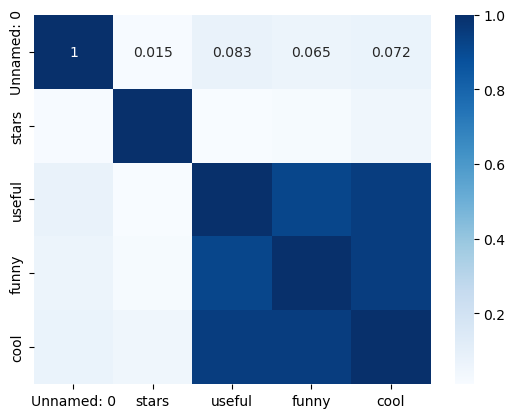

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

## <font color=blue> Feature Engineering

### <font color=#9e32a8> Gereksiz Verileri Silme İşlemi Yapıyoruz

In [22]:
df=df.drop(['Unnamed: 0','useful','funny','cool'],axis=1)
df.head(1)

,review_id,user_id,business_id,stars,text,date
0,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18


### <font color=#1cfc03> Outlier Bakıyoruz

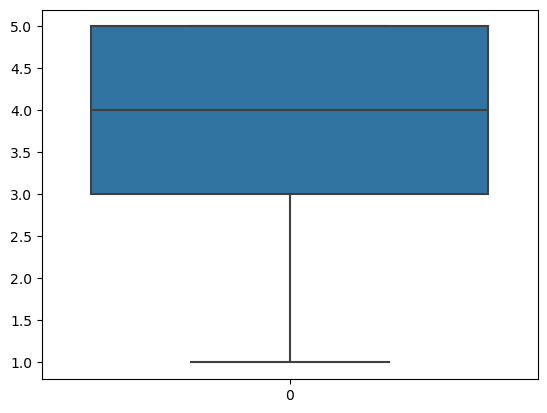

In [24]:
sns.boxplot(df['stars']);

## <font color='Purple'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzetmaye Başladık

In [26]:
df.head(1)

,review_id,user_id,business_id,stars,text,date
0,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18


### <font color=orange> review_id'yi İnceliyoruz 

In [28]:
df['review_id']=df['review_id'].str.lower() # hepsini küçük harfe çevir
df['review_id']=df['review_id'].str.replace('[^\w\s]','',regex=True) # notalama işaretlerini kaldır
df['review_id']=df['review_id'].str.replace('\n','') # Enterları kaldır
df['review_id']=df['review_id'].str.replace('\d','') # \d =disig sayıları demek
df['review_id']=df['review_id'].str.replace('\r','') # \r Satır beşları veya Enter'a başılmış yerleri kaldırıyor

### <font color=orange> user_id'yi İnceliyoruz 

In [30]:
df['user_id']=df['user_id'].str.lower() # hepsini küçük harfe çevir
df['user_id']=df['user_id'].str.replace('[^\w\s]','',regex=True) # notalama işaretlerini kaldır
df['user_id']=df['user_id'].str.replace('\n','') # Enterları kaldır
df['user_id']=df['user_id'].str.replace('\d','') # \d =disig sayıları demek
df['user_id']=df['user_id'].str.replace('\r','') # \r Satır beşları veya Enter'a başılmış yerleri kaldırıyor

### <font color=orange> business_id'yi İnceliyoruz 

In [32]:
df['business_id']=df['business_id'].str.lower() # hepsini küçük harfe çevir
df['business_id']=df['business_id'].str.replace('[^\w\s]','',regex=True) # notalama işaretlerini kaldır
df['business_id']=df['business_id'].str.replace('\n','') # Enterları kaldır
df['business_id']=df['business_id'].str.replace('\d','') # \d =disig sayıları demek
df['business_id']=df['business_id'].str.replace('\r','') # \r Satır beşları veya Enter'a başılmış yerleri kaldırıyor

### <font color=orange> text'i İnceliyoruz 

In [34]:
def detect_veri(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [35]:
df['language']=df['text'].apply(detect_veri)

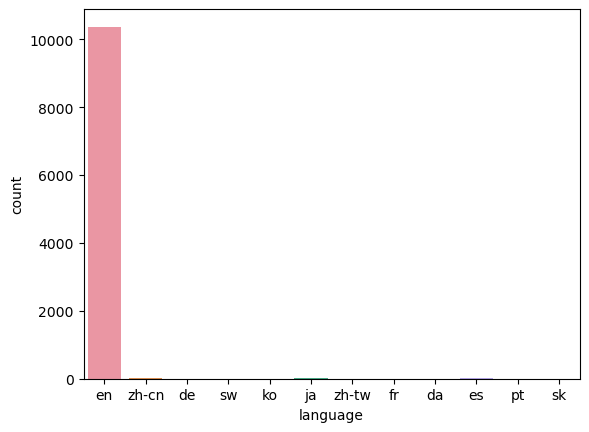

In [36]:
sns.countplot(x=df['language']);

In [37]:
df=df[df['language']=='en']

In [38]:
df.drop(index= df[df['language']!='en'].index, inplace=True)

In [39]:
df['text']=df['text'].str.lower() # hepsini küçük harfe çevir
df['text']=df['text'].str.replace('[^\w\s]','',regex=True) # notalama işaretlerini kaldır
df['text']=df['text'].str.replace('\n','') # Enterları kaldır
df['text']=df['text'].str.replace('\d','') # \d =disig sayıları demek
df['text']=df['text'].str.replace('\r','') # \r Satır başları veya Enter'a başılmış yerleri kaldırıyor

### <font color=orange> date'yi İnceliyoruz 

In [41]:
df['date']=pd.to_datetime(df['date'])

In [42]:
df['day']=(df['date']).dt.day
df['month']=(df['date']).dt.month
df['year']=(df['date']).dt.year

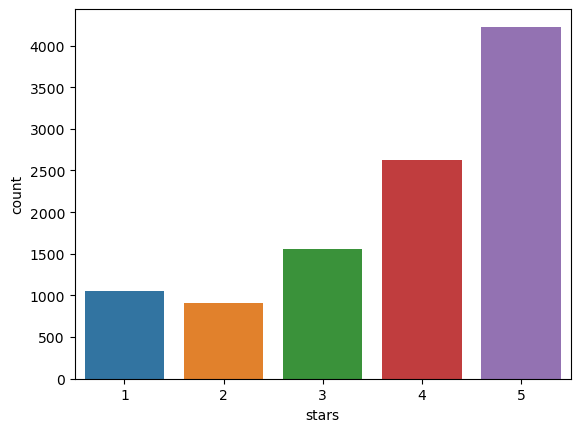

In [43]:
sns.countplot(x=df['stars']);

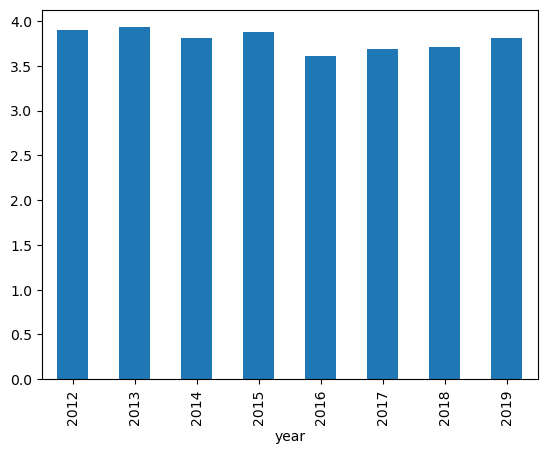

In [44]:
df.groupby('year')['stars'].mean().plot(kind='bar');

In [45]:
df.head()

,review_id,user_id,business_id,stars,text,date,language,day,month,year
0,_wtgv5xnaqb_xd1d7z0jg,6pgdgb3hrzdsfl2giulo8w,resducs7fiiihp38d6_6g,5,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,en,4,12,2012
1,jlnnsvmplk_1x2hwzk24w,is9yw8p2uapbx6fnllx4ka,resducs7fiiihp38d6_6g,4,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,en,17,1,2014
2,hbkowfforrb6aqkhc_li2a,uzdfse_ahbfbchgn6xa8tw,resducs7fiiihp38d6_6g,4,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,en,8,6,2015
3,rbkxvrgzg5kdcl2a66qyma,8zwjnaewsymxdzkx3b0ttq,resducs7fiiihp38d6_6g,1,not worth it too salty food and expensive this...,2016-12-19 16:15:29,en,19,12,2016
4,5tw_pedohvi9bgeibnsisg,e0sm4ve7ifanfyeqmcv8eg,resducs7fiiihp38d6_6g,5,i would give this infinite stars if i could my...,2015-07-28 07:13:17,en,28,7,2015


In [46]:
df['sentiment']=df['stars']

In [47]:
df['sentiment']=df['sentiment'].replace([5,4],'olumlu')
df['sentiment']=df['sentiment'].replace([1,2],'olumsuz')
df['sentiment']=df['sentiment'].replace([3],'notr')

## <font color=#eb1e0c> Sentiment Analysis

In [50]:
df=df[['stars','text','sentiment']]

In [52]:
df=df[(df['sentiment']=='olumlu')|(df['sentiment']=='notr')|(df['sentiment']=='olumsuz')]

In [54]:
df.reset_index(drop=True,inplace=True)

In [56]:
x=df['text']
y=df['sentiment']

In [58]:
yelpbw=df[(df.stars==1,2)|(df.stars==3)|(df.stars==4,5)]

In [60]:
yelpbw.reset_index(drop=True,inplace=True)

In [62]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2))

In [64]:
x=yelpbw["text"]
y=yelpbw["stars"]

In [66]:
x=vect.fit_transform(x)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [68]:
def lemmafn(text):
    words=TextBlob.words
    return [pr.stem(word) for word in words]
# verilen bir metin içerisindeki kelimeleri köklerine (lemma) indirgemek için kullanılıyor.

### <font color=#e64210> Regression

In [70]:
Lr=LogisticRegression()

In [71]:
Lr.fit(x_train,y_train)
pred=Lr.predict(x_test)
accuracy_score(pred,y_test)

0.9450757575757576

### <font color=#e64210> Classification

In [73]:
Bc=BernoulliNB()
DTc=DecisionTreeClassifier()
GBc=GradientBoostingClassifier()
G=GaussianNB()
KNc=KNeighborsClassifier()
Mc=MultinomialNB()
RFc=RandomForestClassifier()

#### <font color=#b798fa> BernoulliNB ile Modeli Hesapladık

In [75]:
Bc.fit(x_train,y_train)
Bctahmin=Bc.predict(x_test)
accuracy_score(Bctahmin,y_test)

0.8001893939393939

#### <font color=#b798fa> DecisionTreeClassifier ile Modeli Hesapladık

In [77]:
DTc.fit(x_train,y_train)
DTctahmin=DTc.predict(x_test)
accuracy_score(DTctahmin,y_test)

0.865530303030303

#### <font color=#b798fa> GradientBoostingClassifier ile Modeli Hesapladık

In [79]:
GBc.fit(x_train,y_train)
GBctahmin=GBc.predict(x_test)
accuracy_score(GBctahmin,y_test)

0.9109848484848485

#### <font color=#b798fa> GaussianNB ile Modeli Hesapladık

In [81]:
#Seyrek matrix olduğu ve toarray kullanılamadığı için iptal ettim
#G.fit(x_train,y_train)
#Gtahmin=G.predict(x_test)
#accuracy_score(Gtahmin,y_test)

#### <font color=#b798fa> KNeighborsClassifier ile Modeli Hesapladık

In [83]:
KNc.fit(x_train,y_train)
KNctahmin=KNc.predict(x_test)
accuracy_score(KNctahmin,y_test)

0.8058712121212122

#### <font color=#b798fa> MultinomialNB ile Modeli Hesapladık

In [85]:
Mc.fit(x_train,y_train)
Mctahmin=Mc.predict(x_test)
accuracy_score(Mctahmin,y_test)

0.9346590909090909

#### <font color=#b798fa> RandomForestClassifier ile Modeli Hesapladık

In [87]:
RFc.fit(x_train,y_train)
RFctahmin=RFc.predict(x_test)
accuracy_score(RFctahmin,y_test)

0.8626893939393939

In [88]:
text_data = df['text'].tolist()
blob = TextBlob(text_data[0])
blob.sentiment

Sentiment(polarity=0.3373304473304473, subjectivity=0.5869264069264069)

## <font color=#10e6e6> Yorumları En çok Sayıdaki Kelimeleri Sekil İçine Alma

In [91]:
#wc=wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png')) #resmi okumak içim veriyi diziye,rakama çevirdik
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)#metinlerde sık kullanılan ancak anlamsal olarak önemli olmayan kelimeleri kaldırır
    #mask=mask yukarıda tanımladığımız maskeyi kullan
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off') # Bunla x ve y gözükmüyor

In [92]:
iyi=df[df['stars']==5]['text']
iyi=df[df['stars']==4]['text']
orta=df[df['stars']==3]['text']
kotu=df[df['stars']==2]['text']
kotu=df[df['stars']==1]['text']

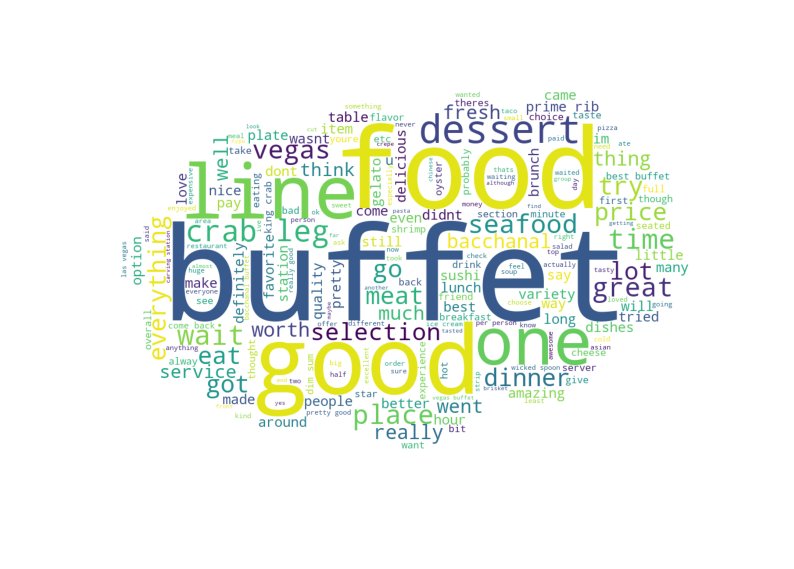

In [93]:
wc(iyi,'white')

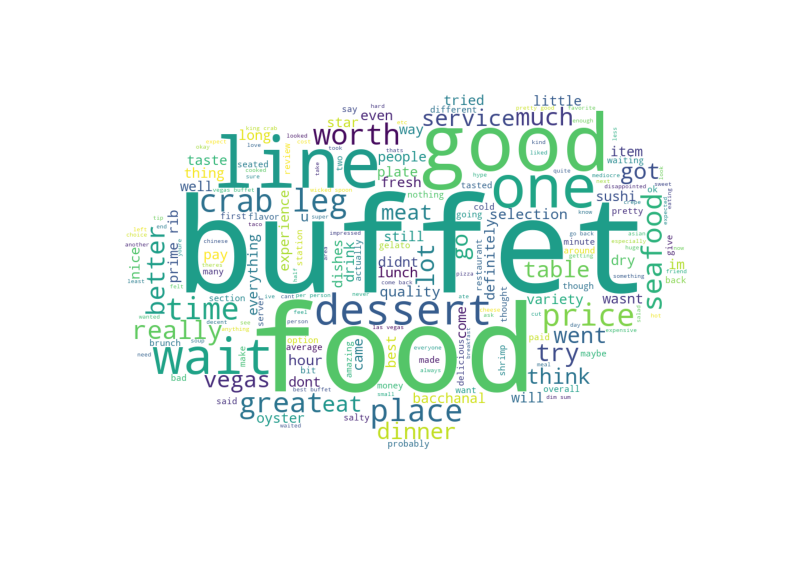

In [169]:
wc(orta,'white')

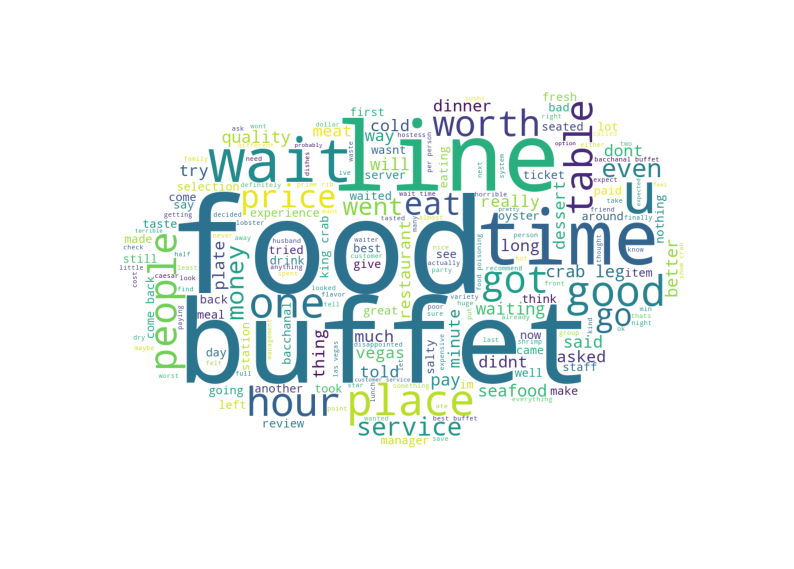

In [95]:
wc(kotu,'white')